**Pedestrian Path Analysis**

To assess the concentration of pedestrian paths within a specific area, providing an indication of how well-developed the pedestrian infrastructure is in that neighborhood.


**IMPORTING NECESSARY LIBRARIES:**

In [1]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

**Mounting Google Drive:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading GeoDataFrame with Pedestrian Paths:**

In [3]:
pedestrian_data = gpd.read_file("/content/drive/My Drive/Data Visualization/Vernazza.geojson")
neighbour_data = gpd.read_file("/content/drive/My Drive/Data Visualization/Riomaggiore.geojson")

**Visualizing Pedestrian Paths Density using GeoPandas:**

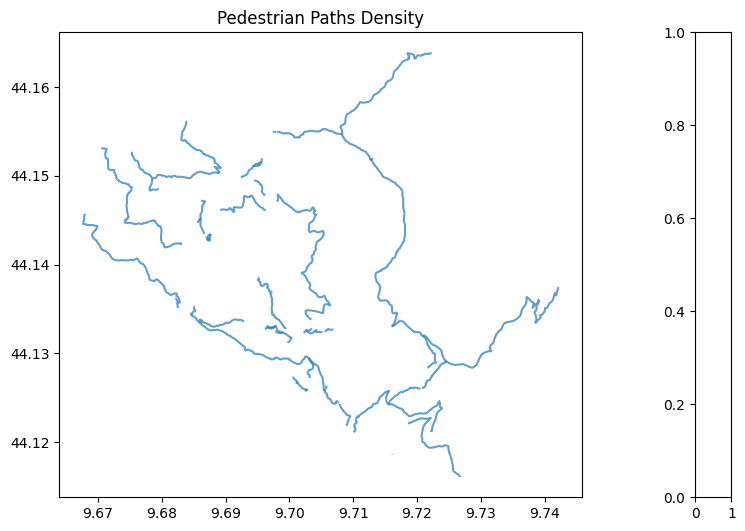

In [4]:
#PLOTTING CITY-1 (VERNAZZA)
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pedestrian_data.plot(ax=ax, alpha=0.7, legend=True, cax=cax)
ax.set_title("Pedestrian Paths Density")

# Display the plot
plt.show()

**Creating a Folium Map:**

In [5]:
#MAP OF CITY-1 (VERNAZZA)
map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# Add pedestrian paths to the map
folium.GeoJson(pedestrian_data).add_to(mymap)

# Display the map
display(mymap)

<ipython-input-5-d8d346a4f8c8>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]


**PATH DENSITY AND FOLIUM MAP OF CITY-2 (RIOMAGGIORE)**

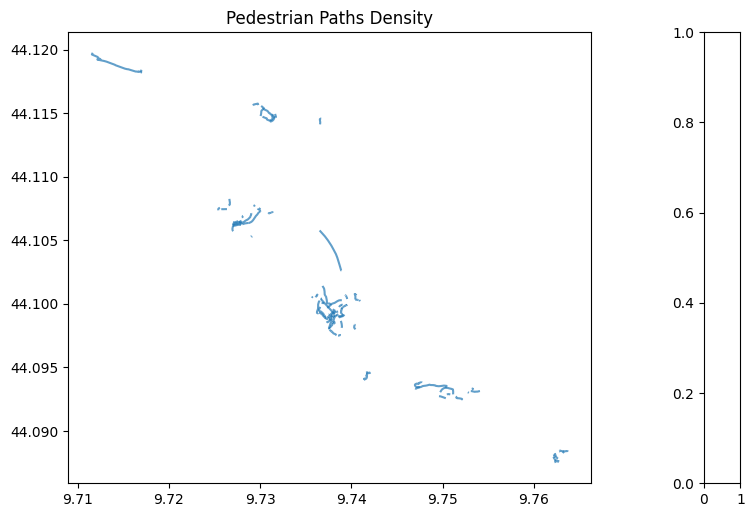

In [6]:
#PLOTTING CITY-2 (RIOMAGGIORE)
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
neighbour_data.plot(ax=ax, alpha=0.7, legend=True, cax=cax)
ax.set_title("Pedestrian Paths Density")

# Display the plot
plt.show()

In [7]:
#MAP OF CITY-2 (RIOMAGGIORE)
map_center = [neighbour_data.geometry.centroid.y.mean(), neighbour_data.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# Add pedestrian paths to the map
folium.GeoJson(neighbour_data).add_to(mymap)

#Display the map
display(mymap)

<ipython-input-7-421acc94b636>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [neighbour_data.geometry.centroid.y.mean(), neighbour_data.geometry.centroid.x.mean()]


***Comparison of two Cities:***

**Calculate Total Lengths:**

In [8]:
city1_length = pedestrian_data['geometry'].length.sum()
city2_length = neighbour_data['geometry'].length.sum()

<ipython-input-8-bdc6e53cff0c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city1_length = pedestrian_data['geometry'].length.sum()
<ipython-input-8-bdc6e53cff0c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city2_length = neighbour_data['geometry'].length.sum()


**Visualization**

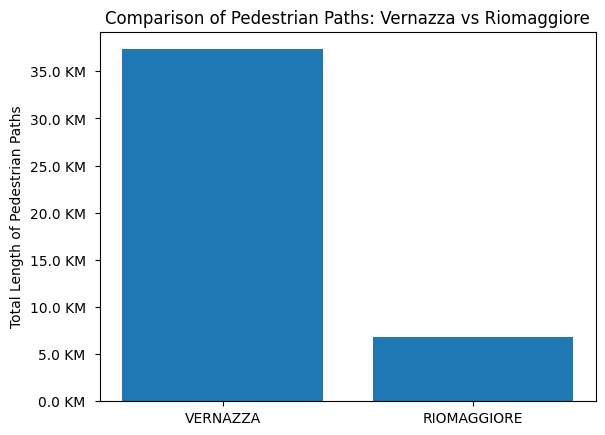

In [9]:
#PLOTTING IN A BAR CHART
fig, ax = plt.subplots()
ax.bar(['VERNAZZA', 'RIOMAGGIORE'], [city1_length, city2_length])
ax.set_ylabel('Total Length of Pedestrian Paths')
ax.set_title('Comparison of Pedestrian Paths: Vernazza vs Riomaggiore')

# SCALE
tick_values = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
ax.set_yticks(tick_values)
ax.set_yticklabels([f'{val*100} KM ' for val in tick_values])

plt.show()


***From the above visualization, we can see that City-1 (Vernazza) has higher walkable disctance than City-2 (Riomaggiore).***